In [95]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from matplotlib import cm
from celluloid import Camera
import pickle #store

In [96]:
n = 10 #nb des noeuds
k = 40  #nb des itérations
c = 1/(n+1)

a = 30 #longueur de l'espace
b = 20 #largeur de l'espace

r_det = ( ((a**2+b**2)**(1/2))/5 )*2 #rayon de détection
r_sec = r_det/3  #rayon de sécurité

print(r_det)
print(r_sec)

14.422205101855956
4.8074017006186525


In [97]:
def positionToAdjMatrix(x,y,r_det):
    n=len(x)
    matrix = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            distance_ij = ((x[i]-x[j])**2 + (y[i]-y[j])**2)**(1/2)

            if distance_ij <= r_det :
                matrix[i][j] = 1

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0

    return matrix


def Laplacienne(M):
    #matrice degré
    D = np.identity(len(M[0]))
    degre = np.sum(M,axis=1)
    for i in range(n):
        D[i][i]=degre[i]
    
    #print("\n matrice degre\n",D)
    
    L = D - M
    
    return L

def adjToCom(M):
    #matrice de communication
    C = np.copy(np.array(M))
    facteur=np.sum(M,axis=1)
    C = C.astype('float')
    for i in range(n):
        if facteur[i]==0:
            facteur[i] = 1
        C[i]=C[i]/facteur[i]
    return C


def pMatrix(M):
    I = np.identity(len(M[0]))
    P = I - c*Laplacienne(M)
    
    return P

def randStocastic(n):
    matrix = np.random.rand(n,n)

    m = matrix/matrix.sum(axis=1)[:,None]
    
    return m


def matriceCom(H,W):
    
    I = np.identity(n)
    J = np.ones(n)
    Q = H + I
    Q_ = J - Q
    
    A = np.multiply(Q,W) + np.multiply(np.dot((np.multiply(W,Q_)),J),I)

    return A


def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()
    

def mouvement(x,y,A):      
    for i in range(n):
        for j in range(n):
            x[i] += (x[j]-x[i])*A[i][j]
            y[i] += (y[j]-y[i])*A[i][j]
            
    return x,y


In [98]:
#positionner les robots aléatoirement 
rnd = np.random
rnd.seed(0)

#x = rnd.choice(np.arange(0., a, 5), size=n)
#y = rnd.choice(np.arange(0., b, 5), size=n)

x = [20., 25.,  0., 15., 30., 15.,  5., 15., 25., 10.]
y = [ 0., 15., 10.,  10.,  20.,  0., 10.,  5., 10., 15.]


matrice d'adjacence :
 [[0 0 0 1 0 1 0 1 1 0]
 [0 0 0 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 1 0]
 [1 0 0 1 0 0 1 1 1 0]
 [0 0 1 1 0 1 0 1 0 1]
 [1 1 0 1 0 1 1 0 1 1]
 [1 1 0 1 1 1 0 1 0 0]
 [0 0 1 1 0 0 1 1 0 0]]


 matrice de communication :
 [[0.         0.         0.         0.25       0.         0.25
  0.         0.25       0.25       0.        ]
 [0.         0.         0.         0.25       0.25       0.
  0.         0.25       0.25       0.        ]
 [0.         0.         0.         0.         0.         0.
  0.5        0.         0.         0.5       ]
 [0.14285714 0.14285714 0.         0.         0.         0.14285714
  0.14285714 0.14285714 0.14285714 0.14285714]
 [0.         0.5        0.         0.         0.         0.
  0.         0.         0.5        0.        ]
 [0.2        0.         0.         0.2        0.         0.
  0.2        0.2        0.2        0.        ]
 [0.         0.         0.2        0.2        0.         0.2
  

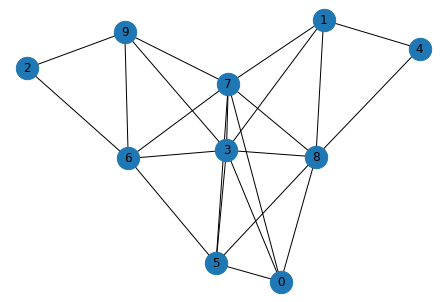

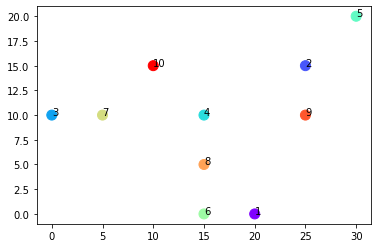

In [99]:
M = positionToAdjMatrix(x,y,r_det)

#affichage
a = np.array(M)
print("matrice d'adjacence :\n",a.reshape(n,n))


#matrice de communication
C = adjToCom(M)
print("\n\n matrice de communication :\n", C.reshape(n,n))

print(C.sum(axis=0))

show_graph_with_labels(a)


colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(1,n+1):
    plt.annotate(i, (x[i-1], y[i-1]))


 matrice adjacence 
 [[0 0 0 1 0 1 0 1 1 0]
 [0 0 0 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 1 0]
 [1 0 0 1 0 0 1 1 1 0]
 [0 0 1 1 0 1 0 1 0 1]
 [1 1 0 1 0 1 1 0 1 1]
 [1 1 0 1 1 1 0 1 0 0]
 [0 0 1 1 0 0 1 1 0 0]]


 laplacienne 
 [[ 4.  0.  0. -1.  0. -1.  0. -1. -1.  0.]
 [ 0.  4.  0. -1. -1.  0.  0. -1. -1.  0.]
 [ 0.  0.  2.  0.  0.  0. -1.  0.  0. -1.]
 [-1. -1.  0.  7.  0. -1. -1. -1. -1. -1.]
 [ 0. -1.  0.  0.  2.  0.  0.  0. -1.  0.]
 [-1.  0.  0. -1.  0.  5. -1. -1. -1.  0.]
 [ 0.  0. -1. -1.  0. -1.  5. -1.  0. -1.]
 [-1. -1.  0. -1.  0. -1. -1.  7. -1. -1.]
 [-1. -1.  0. -1. -1. -1.  0. -1.  6.  0.]
 [ 0.  0. -1. -1.  0.  0. -1. -1.  0.  4.]]


 P 
 [[0.63636364 0.         0.         0.09090909 0.         0.09090909
  0.         0.09090909 0.09090909 0.        ]
 [0.         0.63636364 0.         0.09090909 0.09090909 0.
  0.         0.09090909 0.09090909 0.        ]
 [0.         0.         0.81818182 0.         0.         0.
  0.090909

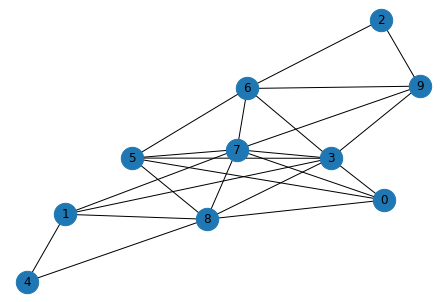

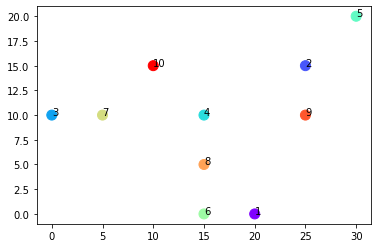

In [100]:

M = positionToAdjMatrix(x,y,r_det)
H = np.array(M).reshape(n,n)
print("\n matrice adjacence \n", H)

L = Laplacienne(M)
print("\n\n laplacienne \n", L)

P = pMatrix(H)
print("\n\n P \n",P)

print("\n\n P \n",np.linalg.matrix_power(P,100))


W = randStocastic(n)
print("\n\n matrice de priorité \n",W)

S=W
O=W

S = S.sum(axis=0)/n
print("\n\n convergence \n",S)


#matrice de communication
A = matriceCom(H,W)
print("\n\n matrice de communication :\n", A)

show_graph_with_labels(H)


colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(1,n+1):
    plt.annotate(i, (x[i-1], y[i-1]))

In [101]:
valPropre = np.linalg.eigvals(L)
print(np.sort(valPropre, axis=0))

[-4.44089210e-16  1.16088296e+00  2.03237741e+00  3.90876698e+00
  4.26150922e+00  5.00000000e+00  6.28113763e+00  7.07055190e+00
  8.00000000e+00  8.28477390e+00]


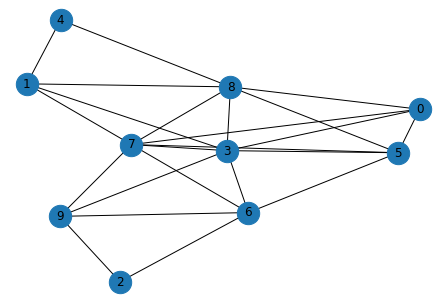

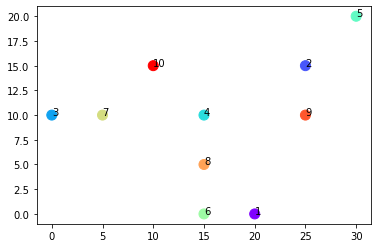

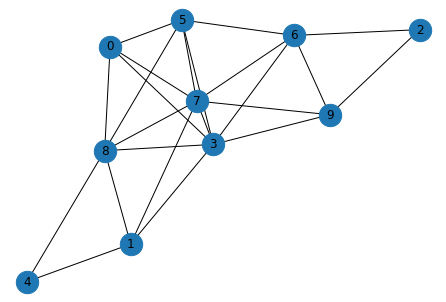

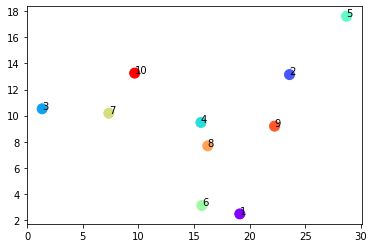

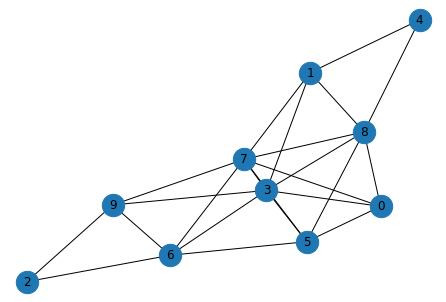

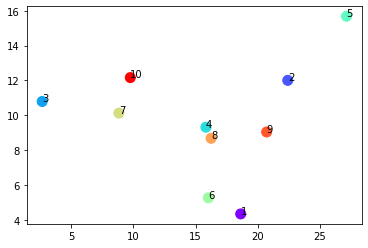

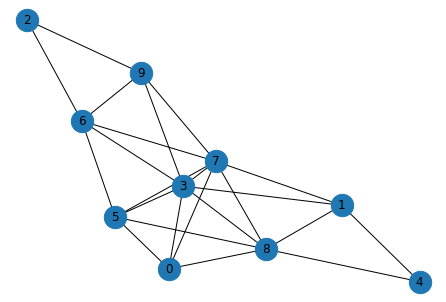

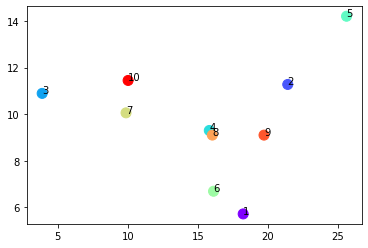

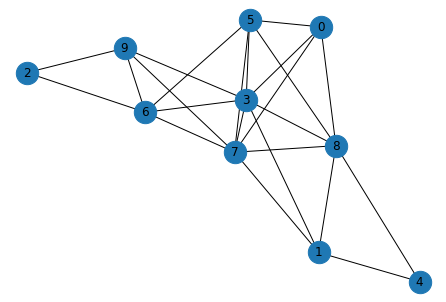

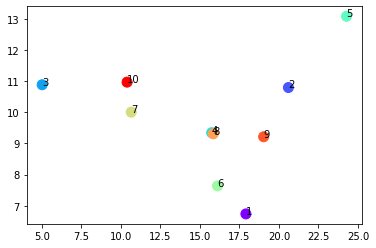

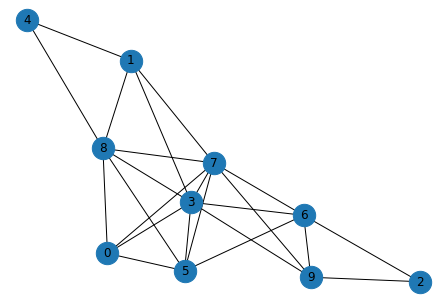

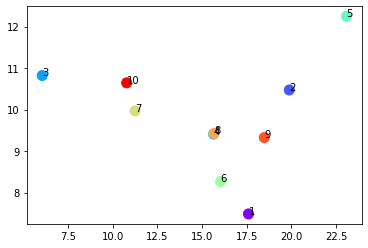

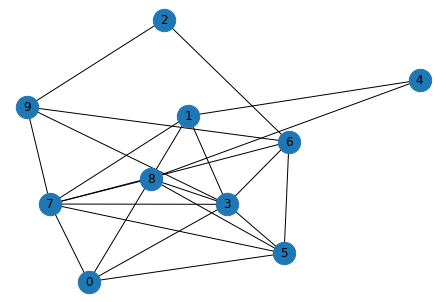

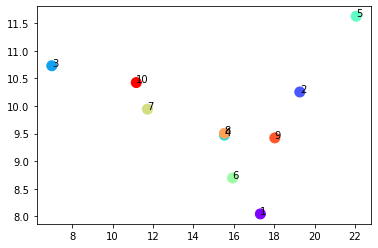

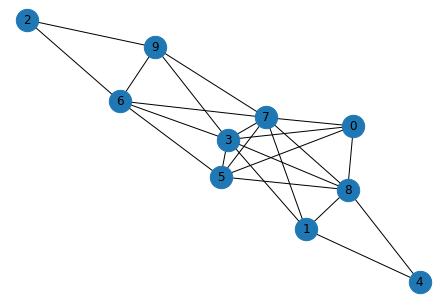

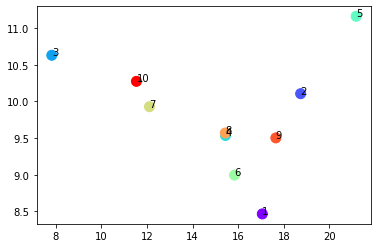

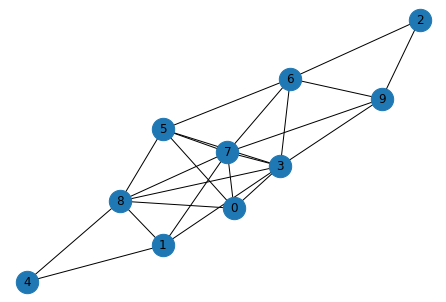

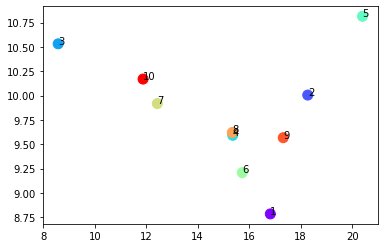

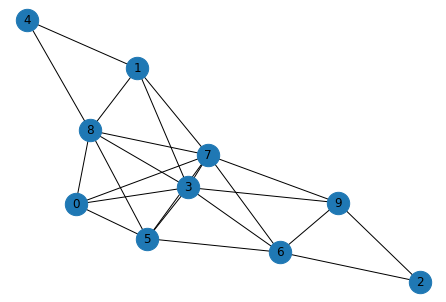

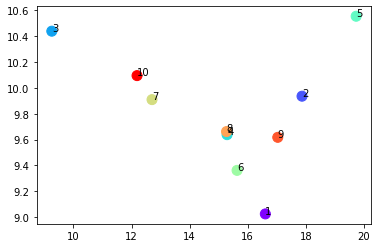

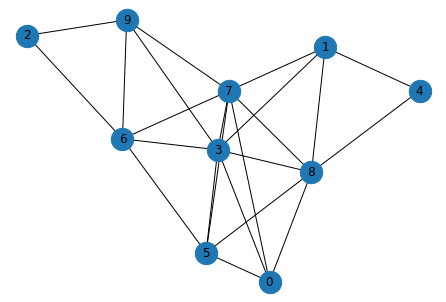

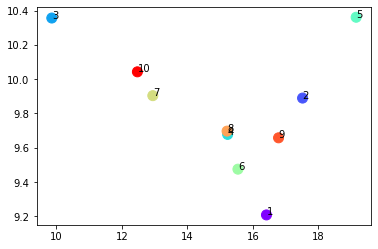

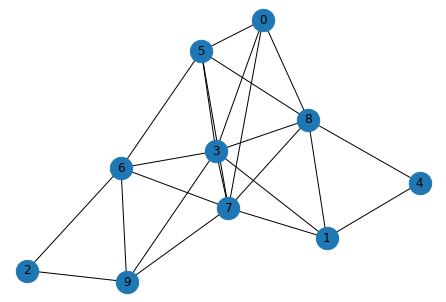

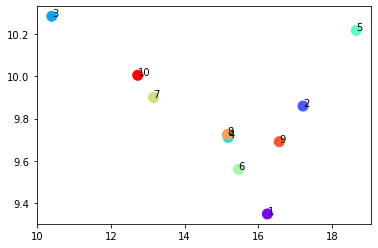

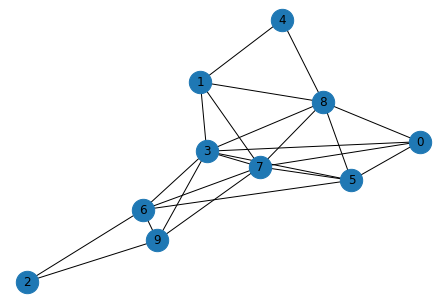

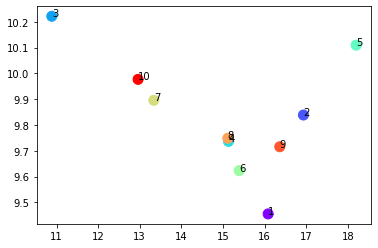

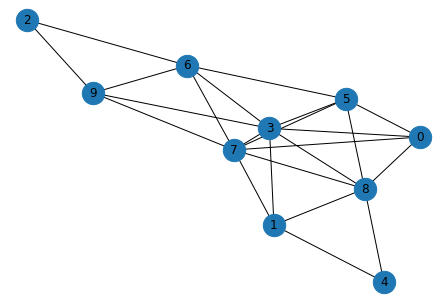

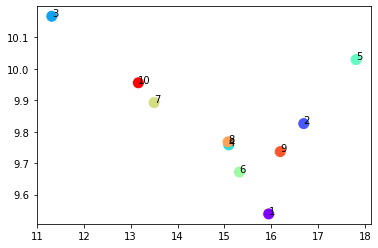

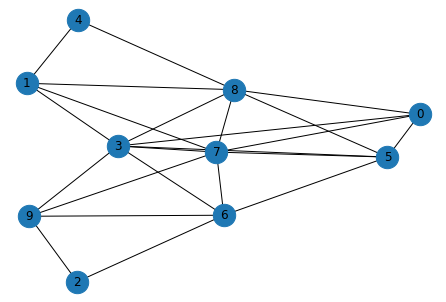

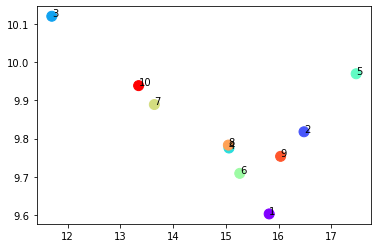

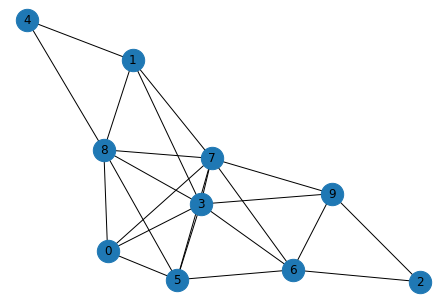

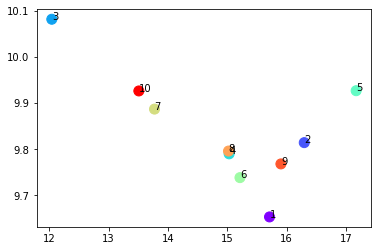

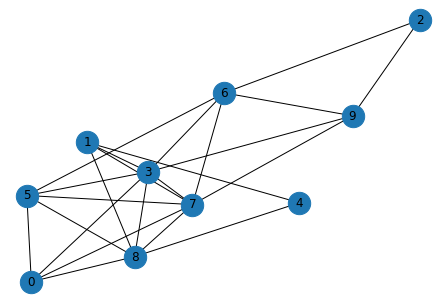

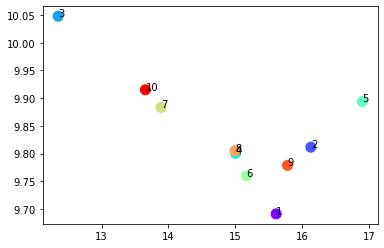

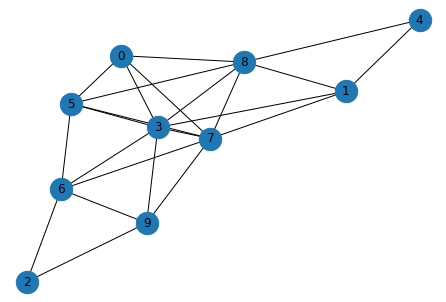

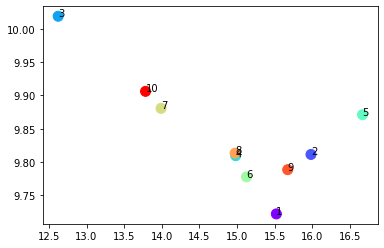

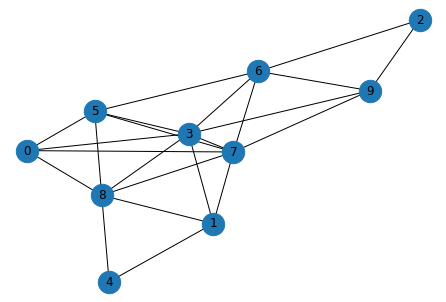

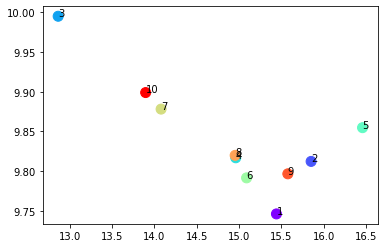

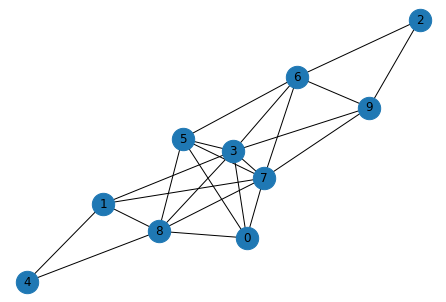

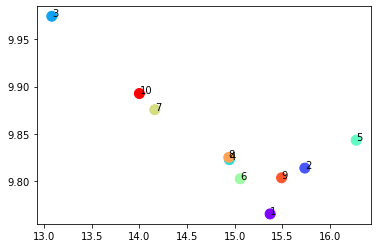

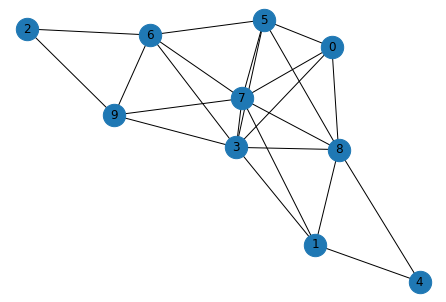

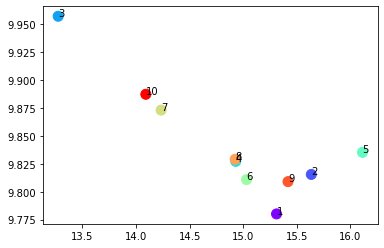

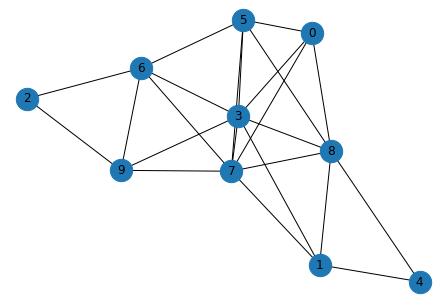

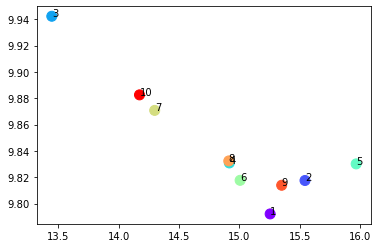

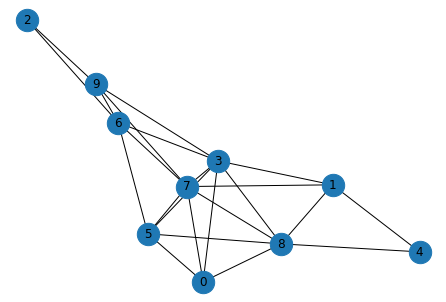

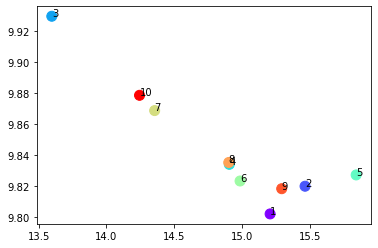

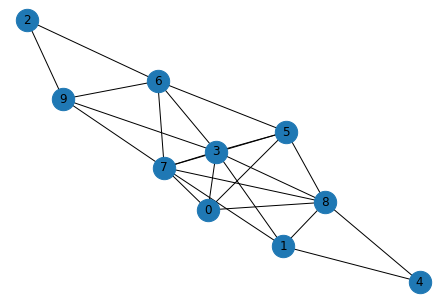

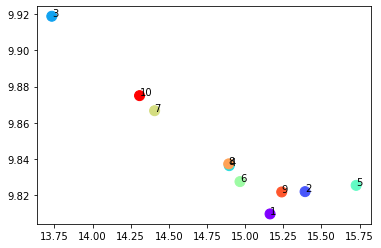

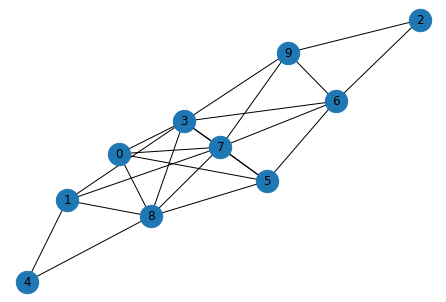

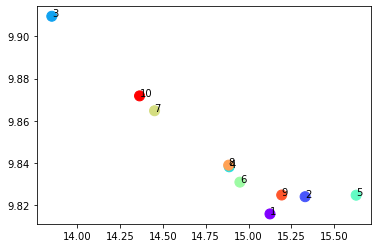

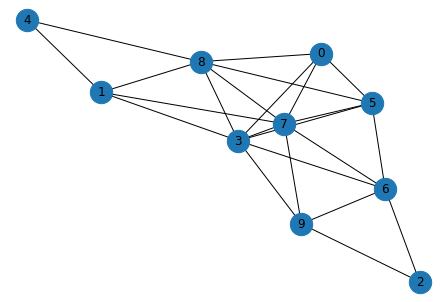

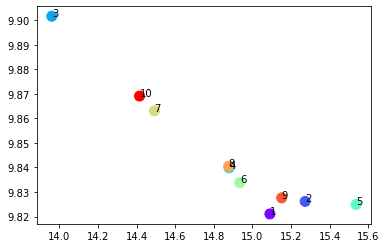

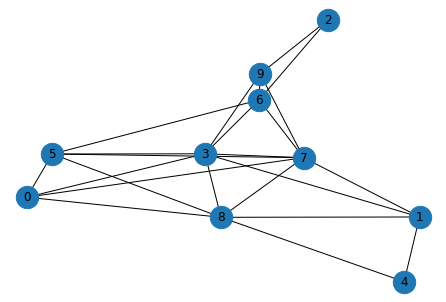

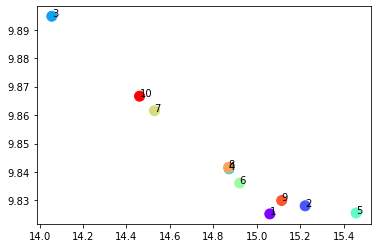

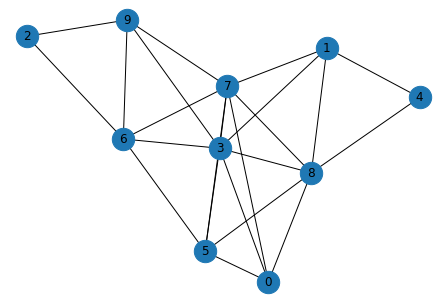

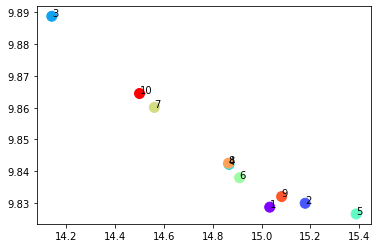

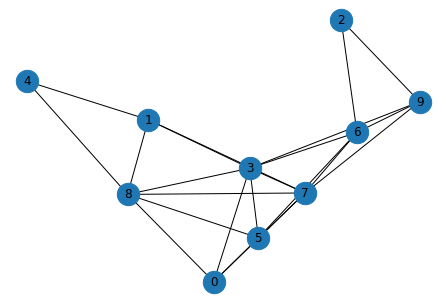

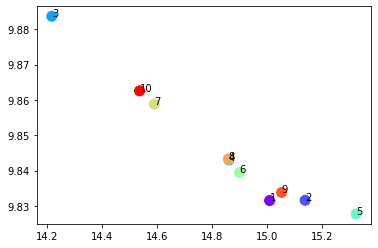

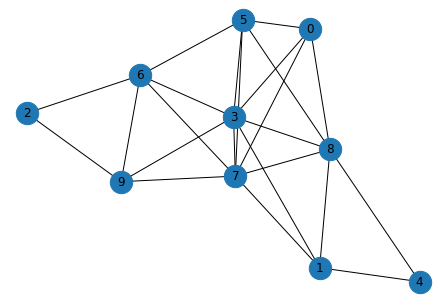

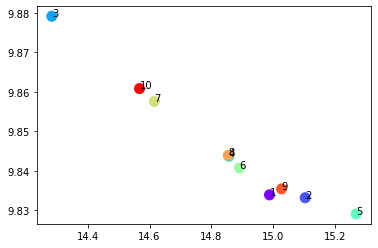

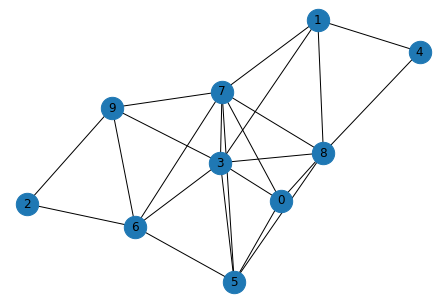

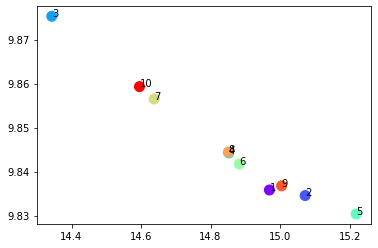

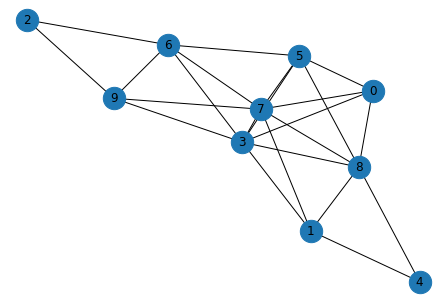

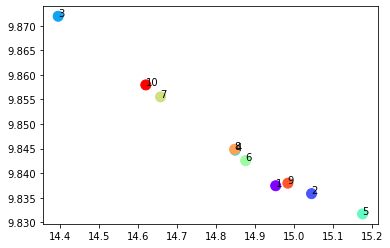

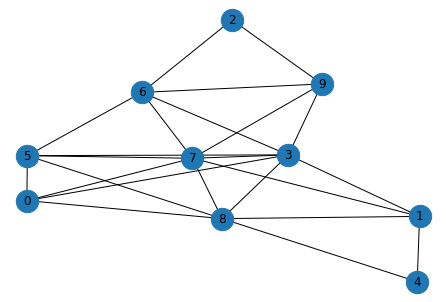

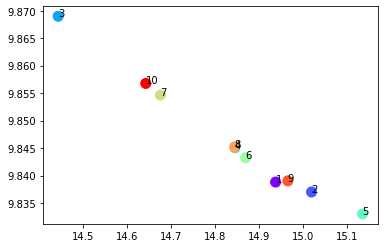

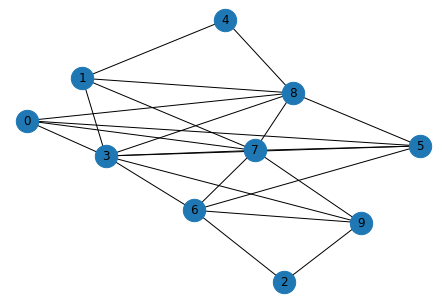

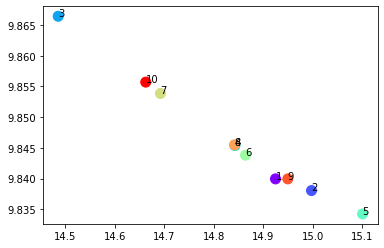

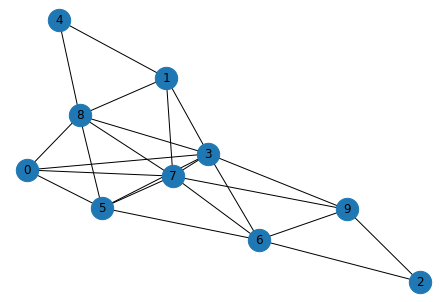

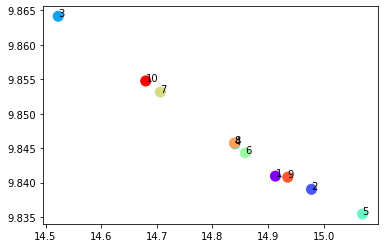

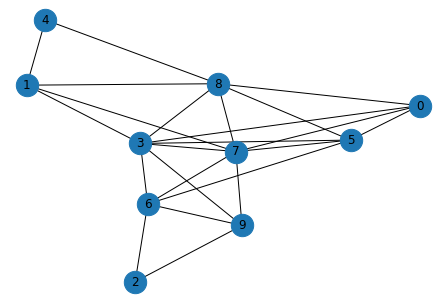

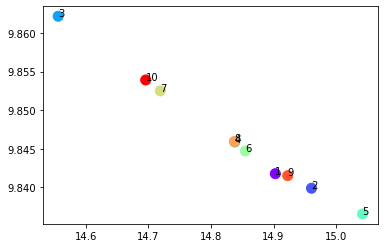

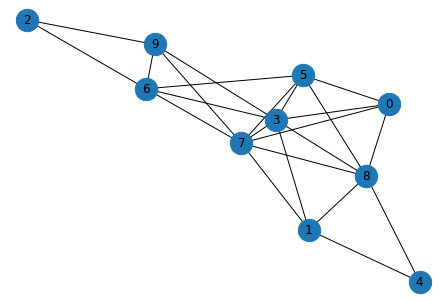

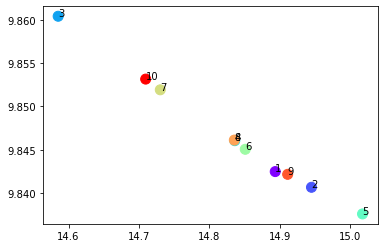

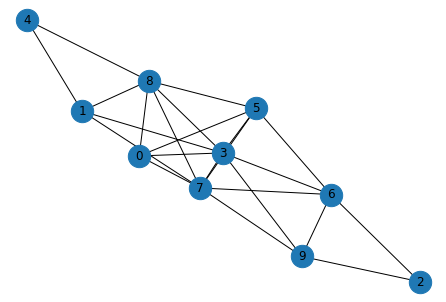

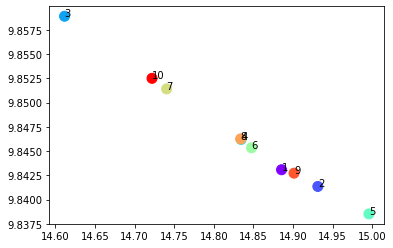

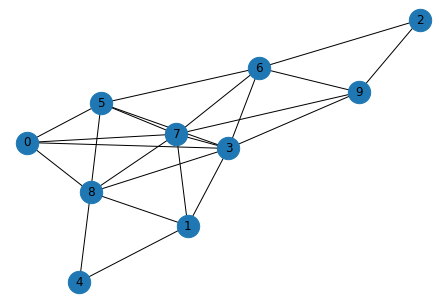

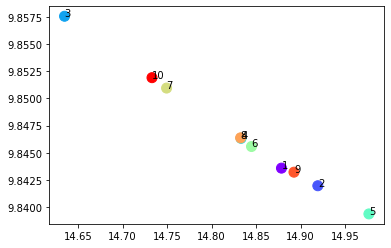

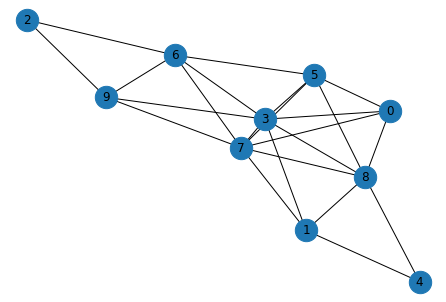

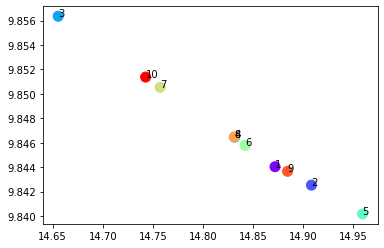



 matrice de priorité 
 [[0.1046274  0.10761756 0.12650109 0.1006398  0.08325511 0.08149973
  0.1157269  0.06369692 0.12842022 0.08801526]
 [0.10458322 0.10749841 0.12655325 0.10071386 0.08297164 0.081467
  0.11593964 0.06375452 0.12861549 0.08790297]
 [0.10470704 0.10801363 0.12634937 0.10027631 0.08432848 0.08168672
  0.11500307 0.06344504 0.12775802 0.08843233]
 [0.10463186 0.10765633 0.12648731 0.10059841 0.08336666 0.08152191
  0.11565523 0.06366928 0.12835476 0.08805825]
 [0.10452212 0.1073223  0.12662899 0.10083067 0.08254445 0.08141373
  0.11625511 0.06384344 0.12890493 0.08773425]
 [0.10463449 0.1076536  0.12648733 0.10060645 0.08335308 0.08151693
  0.11566101 0.06367386 0.12835994 0.08805331]
 [0.1046641  0.10779323 0.12643335 0.10048099 0.08372848 0.08158106
  0.11540621 0.06358645 0.12812679 0.08819934]
 [0.10463186 0.10765633 0.12648731 0.10059841 0.08336666 0.08152191
  0.11565523 0.06366928 0.12835476 0.08805825]
 [0.10460038 0.10754583 0.12653263 0.10068365 0.08308527 

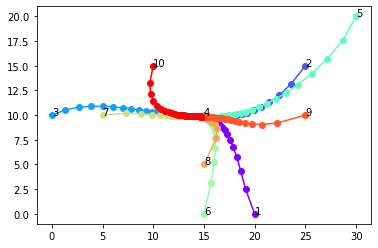

In [102]:
with open("initialCondition.pkl",'wb') as f :
    pickle.dump([x,y],f)

camera = Camera(plt.figure())

#main
X = []
Y = []


for t in range(k):
    
    X.extend(x)
    Y.extend(y)
    
    a = np.array(X).reshape(t+1,n)
    b = np.array(Y).reshape(t+1,n)
    
    #for i in range(n):
    #    plt.plot(a[:, i], b[:, i], color=colors[i])
        
    #M = positionToAdjMatrix(x,y,r_det)
    H = np.array(M).reshape(n,n)
    P = pMatrix(H)
    W = np.dot(P,W)
    A = matriceCom(H,W)
    
    C = adjToCom(M)
    
    show_graph_with_labels(np.array(M))
    
    plt.scatter(x[0:], y[0:], c=colors, s=100)
    
    for i in range(1,n+1):
        plt.annotate(i, (x[i-1], y[i-1]))
        
    x,y = mouvement(x,y,A)
    
    plt.pause(1.1)
    camera.snap()
    
for i in range(n):
    plt.plot(a[:, i], b[:, i],"o-" ,color=colors[i])
    
for i in range(1,n+1):
    plt.annotate(i, (a[0][i-1], b[0][i-1]))

print("\n\n matrice de priorité \n",W)
print("\n\n convergence \n",S)



anim = camera.animate(blit=True)


In [103]:
print(a)

[[20.         25.          0.         15.         30.         15.
   5.         15.         25.         10.        ]
 [19.11100626 23.5785232   1.3472806  15.61740537 28.70494369 15.69780482
   7.34131183 16.23265006 22.23691981  9.66356667]
 [18.6244506  22.40992737  2.65450199 15.82642397 27.13706994 16.02185177
   8.82621345 16.24038994 20.71196848  9.74348169]
 [18.24338388 21.42878089  3.88088913 15.82306334 25.62901855 16.12528885
   9.87258924 16.04023265 19.73259453 10.02187399]
 [17.90596583 20.59622629  5.01244896 15.73936216 24.27461084 16.11060788
  10.64864714 15.83853221 19.02813918 10.38586166]
 [17.59756792 19.8835      6.04501184 15.63487088 23.08911621 16.03808606
  11.24545566 15.67149849 18.47973822 10.77705754]
 [17.31465316 19.26921658  6.980026   15.53275365 22.06124719 15.94067053
  11.71926686 15.53814494 18.03024376 11.16506204]
 [17.05602526 18.73705987  7.82231469 15.44060918 21.17212452 15.8357091
  12.10628862 15.43127735 17.64984869 11.53425662]
 [16.8206

In [104]:
D = (a[0].sum(axis=0)/n)*S
E = (a[0]*O.sum(axis=0)).sum(axis=0)
F = (a[0].sum(axis=0)*O.sum(axis=0))
print(D)
print("\n",E)
print(S.sum(axis=0))

[1.6740379  1.72253836 2.02380837 1.60940188 1.33412207 1.30446039
 1.85039616 1.01861344 2.05359859 1.40902284]

 156.39824292595458
0.9999999999999999


In [88]:
s = 16/15.15539827
print(1/s)

0.947212391875
